In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import os
import json

In [2]:
nodes = pd.read_csv("./attribute_list.csv")
nodes = nodes[["label", "node_label"]].reset_index().set_index("node_label")
node_dict = nodes.to_dict()['index']
node_dict

{'STOREY-3': 0,
 'OPEN_EXHIBITION_SPACE_2': 1,
 'ENERGY_LAB_1': 2,
 'OUTSIDE_RESTROOM': 3,
 'CAFE': 4,
 'BEEHUB_NEXUS': 5,
 'c_0': 6,
 'c_1': 7,
 'c_2': 8,
 'c_3': 9,
 'c_4': 10,
 'c_5': 11,
 'c_6': 12,
 'c_7': 13,
 'c_8': 14,
 'c_9': 15,
 'c_10': 16,
 'c_11': 17,
 'c_12': 18,
 'c_13': 19,
 'c_14': 20,
 'c_15': 21,
 'c_16': 22,
 'c_17': 23,
 'c_18': 24,
 'c_19': 25,
 'c_20': 26,
 'c_21': 27,
 'c_22': 28,
 'c_23': 29,
 'c_24': 30,
 'c_25': 31,
 'c_26': 32,
 'c_27': 33,
 'c_28': 34,
 'c_29': 35,
 'c_30': 36,
 'c_31': 37,
 'c_32': 38,
 'c_33': 39,
 'c_34': 40,
 'c_35': 41,
 'c_36': 42,
 'c_37': 43,
 'c_38': 44,
 'c_39': 45,
 'c_40': 46,
 'c_41': 47,
 'c_42': 48,
 'c_43': 49,
 'c_44': 50,
 'c_45': 51,
 'c_46': 52,
 'c_47': 53,
 'c_48': 54,
 'c_49': 55,
 'c_50': 56,
 'c_51': 57,
 'c_52': 58,
 'c_53': 59,
 'c_55': 60,
 'c_65': 61,
 'c_66': 62,
 'c_76': 63,
 'c_77': 64,
 'c_78': 65,
 'c_79': 66,
 'c_80': 67,
 'c_81': 68,
 'c_82': 69,
 'c_83': 70,
 'c_84': 71,
 'c_85': 72,
 'c_86': 73,
 'c_87'

In [3]:
graphs =[]

G = nx.Graph()
G.add_edge(node_dict['STOREY-3'], node_dict["OPEN_EXHIBITION_SPACE_2"])
G.add_edge(node_dict['STOREY-3'], node_dict["ENERGY_LAB_1"])
G.add_edge(node_dict['STOREY-3'], node_dict["OUTSIDE_RESTROOM"])
G.add_edge(node_dict['STOREY-3'], node_dict["CAFE"])
G.add_edge(node_dict['STOREY-3'], node_dict["BEEHUB_NEXUS"])

space_cell = pd.read_csv("../cell_space.csv")
for i in range(len(space_cell)):
    G.add_edge(node_dict[space_cell.loc[i, "space"]],node_dict[space_cell.loc[i, "cell_id"]])
    
furn_cell = pd.read_csv("../furniture_cell_graph.csv")
id_cells = {}

for i in range(len(furn_cell)):
    id_cells[furn_cell.loc[i, "id"]] = furn_cell.loc[i, "cells"].split("||")

for k, v in id_cells.items():
    for cell in v:
        G.add_edge(node_dict[k],node_dict["c_"+cell])

        
fan_cell = pd.read_csv("../fans_cell_graph.csv")
id_cells = {}

for i in range(len(fan_cell)):
    id_cells["fa_"+str(i)] = fan_cell.loc[i, "cells"].split("||")

for k, v in id_cells.items():
    for cell in v:
        G.add_edge(node_dict[k],node_dict["c_"+cell])


In [5]:
nx.adjacency_matrix(G)

<642x642 sparse matrix of type '<class 'numpy.longlong'>'
	with 1378 stored elements in Compressed Sparse Row format>

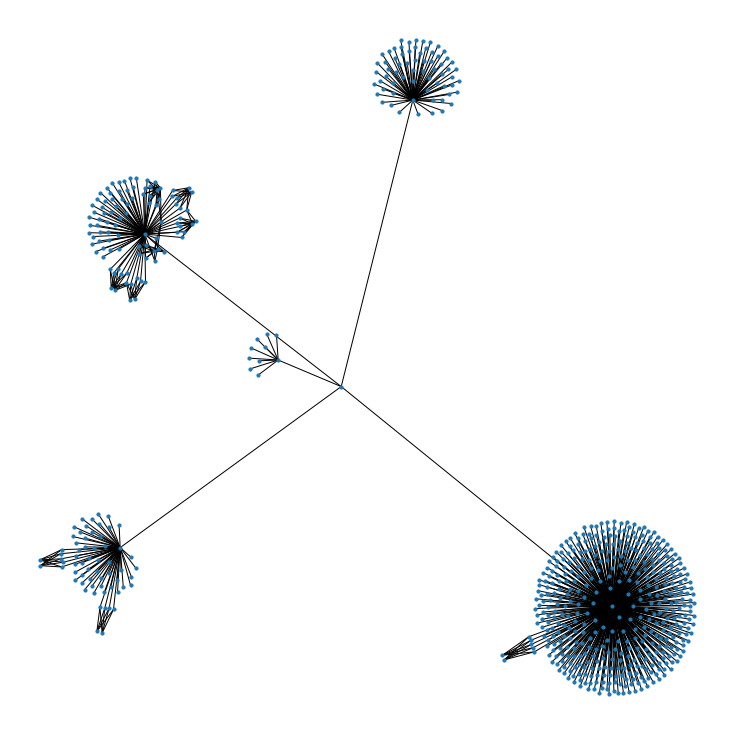

In [50]:
plt.figure(figsize=(10,10))
nx.draw(G,node_size=10)

In [10]:
import os

allfiles = []

for f in os.listdir("./user_graph_1H/"):
    if ".csv" in f:
        allfiles.append(f)

        
allfiles.sort()

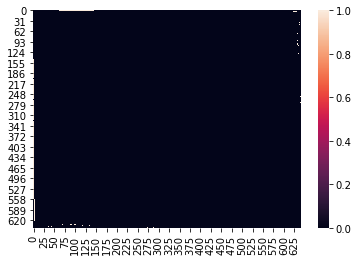

In [11]:
gg = nx.to_pandas_adjacency(G)
sns.heatmap(gg)

In [ ]:
all_adj_matrices = []
for f in allfiles[:]:
    tempG = G.copy()
    df = pd.read_csv("./user_graph_1H/"+f)
    att_df = pd.read_csv("./attmatrix_with_cells/"+f.replace("u_",""))
    for j in range(len(att_df)):
        if att_df.loc[j, "cells"] != "none":
            cells = att_df.loc[j, "cells"].replace("[", "").replace("]","").replace(" ","").replace("'","").split(",")
            for cell in cells:
                tempG.add_edge(node_dict[att_df.loc[j, "node_label"]], node_dict[cell])
        else:
            if not tempG.has_node(node_dict[att_df.loc[j, "node_label"]]):
                tempG.add_node(node_dict[att_df.loc[j, "node_label"]])
    print(len(att_df))
    for x in range(len(att_df)):
        if not tempG.has_node(node_dict[att_df.loc[j, "node_label"]]):
            tempG.add_node(node_dict[att_df.loc[j, "node_label"]])
    graph_pandas = nx.to_pandas_adjacency(tempG)
    adj_matrix = graph_pandas.sort_index()[list(range(len(graph_pandas)))]
    all_adj_matrices.append(adj_matrix.to_numpy())
#     plt.figure(figsize=(10,10))
#     nx.draw(tempG,node_size=10)
#     plt.show()

In [119]:
adj_matrix = np.array(all_adj_matrices)

In [120]:
f = np.load("attmatrix.npz")

In [129]:
attmats_ = np.nan_to_num(f['attmats'])
labels_ = np.nan_to_num(f['labels'])
adjs_ = np.nan_to_num(adj_matrix)

In [130]:
adjs_.shape

(132, 681, 681)

In [131]:
np.savez("../../../Graph_embeddings_repos/STAR/Data/DBLP3.npz", attmats=attmats_, labels = labels_, adjs = adjs_)

In [127]:
f = np.load("attmatrix.npz")

In [128]:
for i in f:
    print(i, f[i].shape)

attmats (681, 132, 16)
labels (681, 9)
adjs (132, 681, 681)
